In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# STEP 1: Load the uploaded CSV file
import io
# Replace `uploaded_file` with the actual uploaded filename if known
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

# STEP 2: Show basic info
print("✅ Dataset Loaded. Shape:", df.shape)
print(df.head())

# STEP 3: Split features and target
# Change 'Outcome' to your actual target column if needed
target_column = 'Outcome'

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in the dataset. Please update the target_column variable.")

X = df.drop(target_column, axis=1)
y = df[target_column]

# STEP 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 6: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# STEP 7: Evaluate the model
y_pred = model.predict(X_test_scaled)

print("\n📊 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Task
Tell me about this dataset.

Here is all the data you need:
"2. Diagnose Diabetes.xlsx"

## Data loading

### Subtask:
Load the "2. Diagnose Diabetes.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_excel("2. Diagnose Diabetes.xlsx")
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: '2. Diagnose Diabetes.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its key characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and creating visualizations.



Data Shape: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250

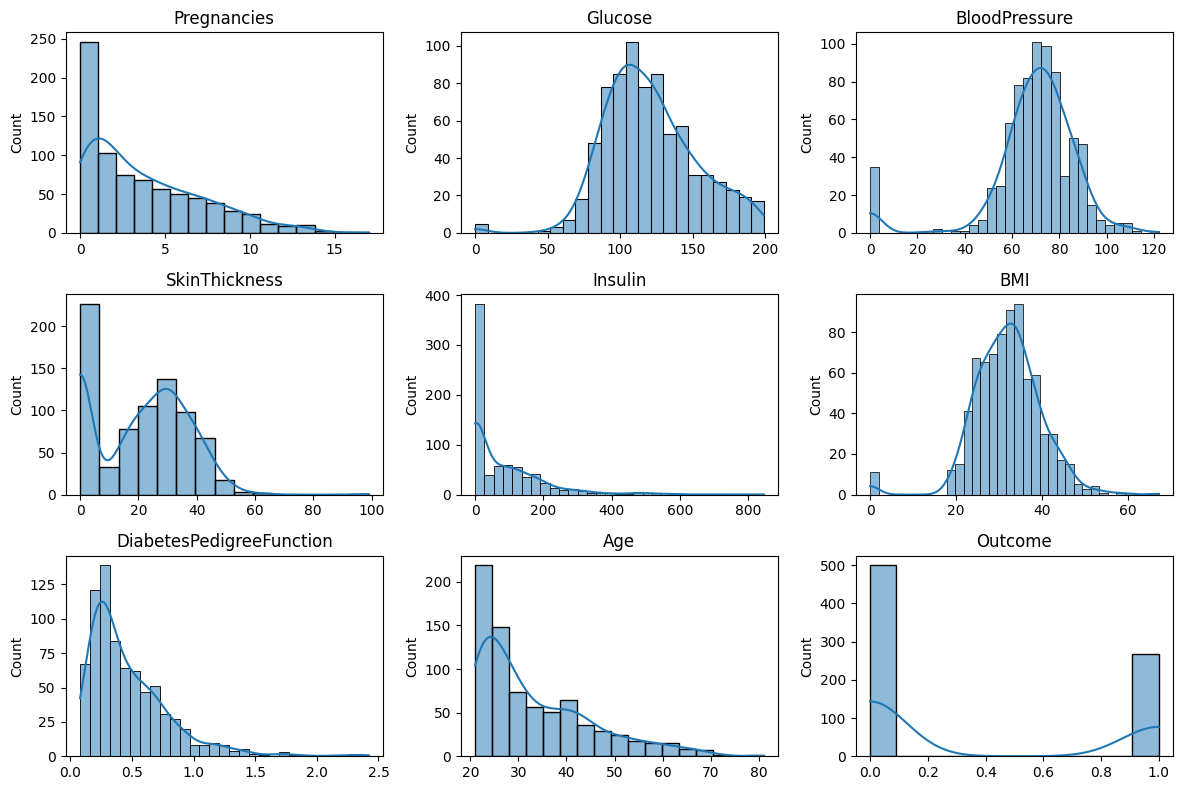

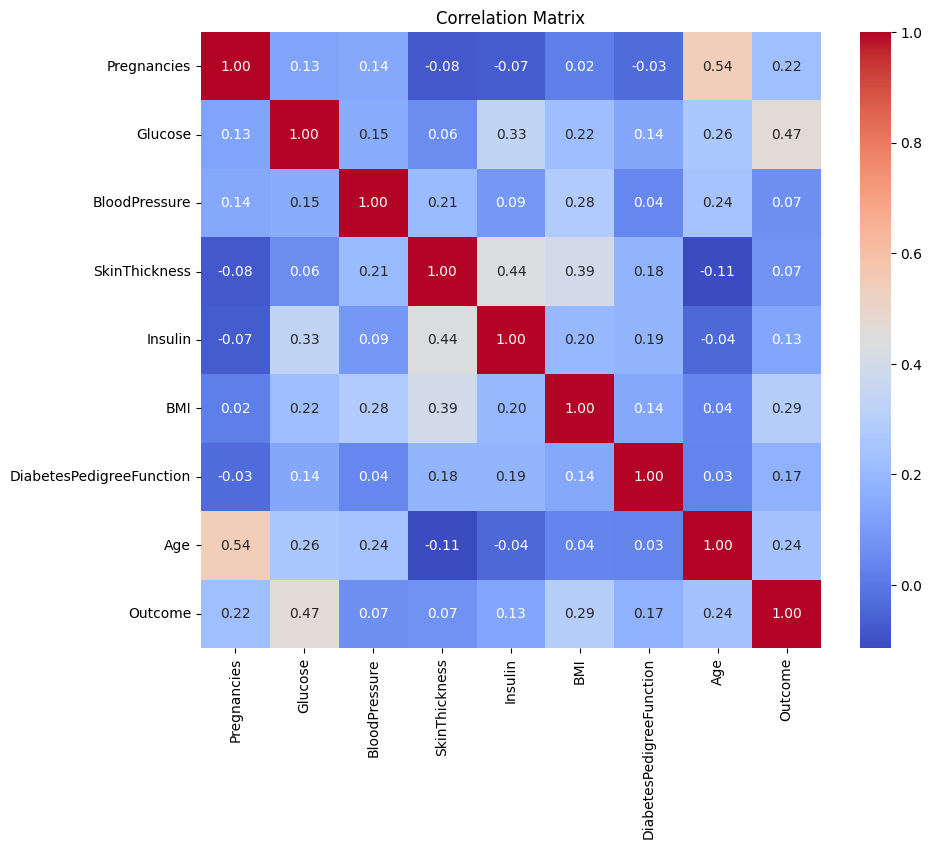

In [2]:
# Examine Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summarize Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Initial Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Histograms for numerical columns
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Document Observations (in comments within the code block for now)
# Observations will be added here based on the output of the above code.

## Data analysis

### Subtask:
Analyze the distribution of key features and calculate summary statistics. Identify potential correlations between variables.


**Reasoning**:
Calculate summary statistics for key features, analyze the 'Outcome' variable distribution, and calculate correlations between features and the outcome.  Create visualizations to support the analysis.



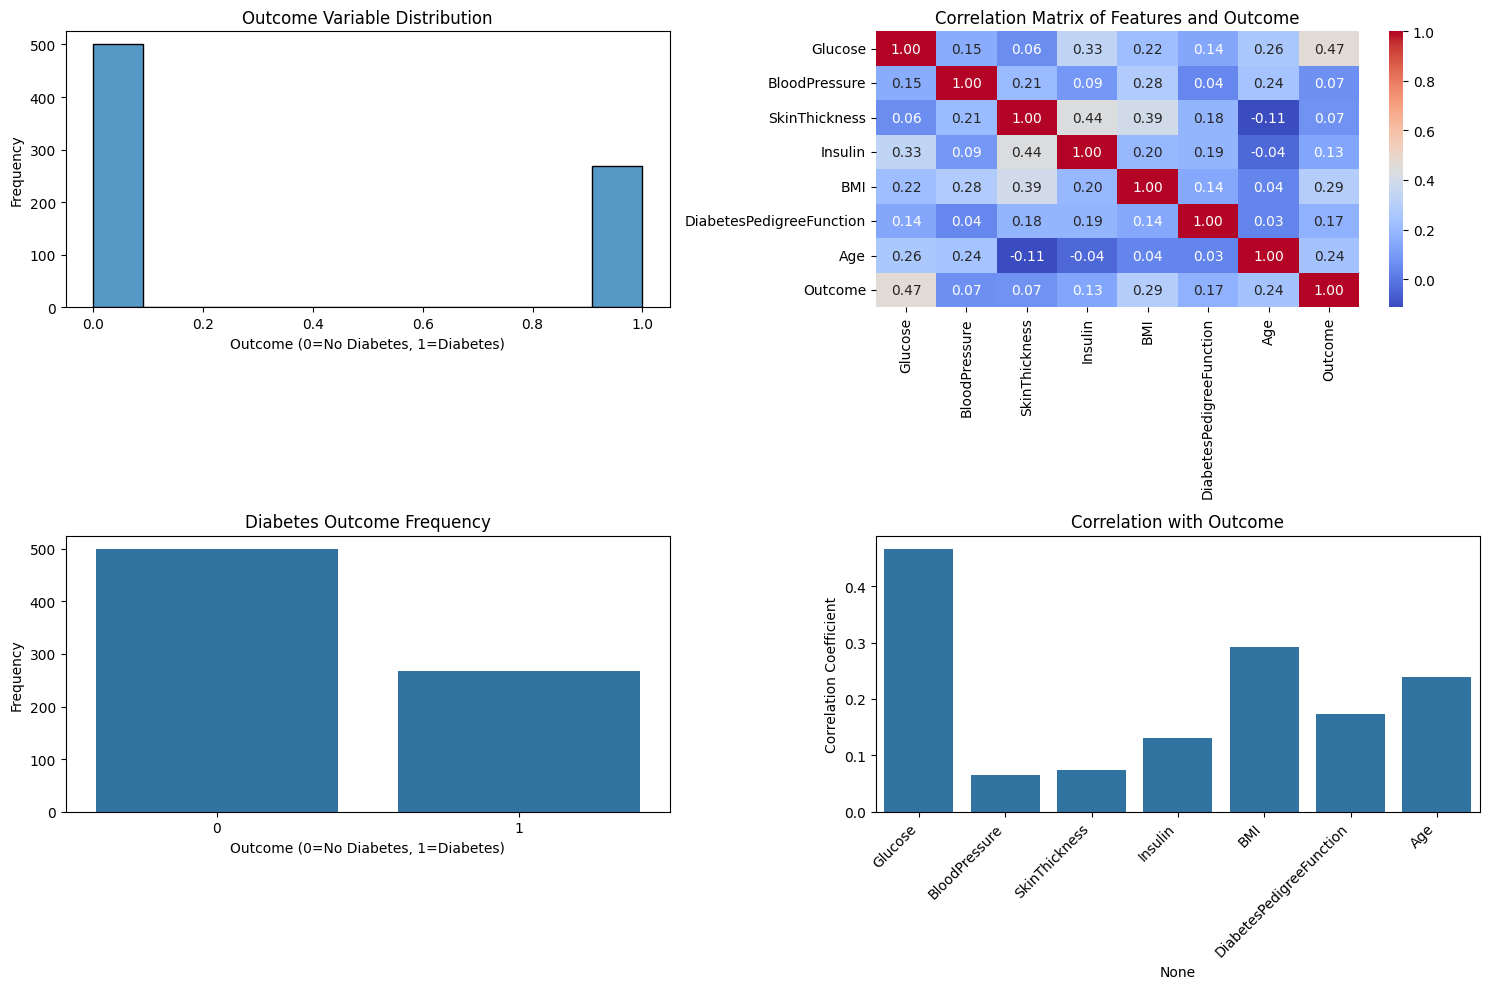

Summary Statistics (including zeros):
           Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                768.000000  768.000000  
mean                   0.471876   33.240885  
std                    0.331329   11.760232  
min                    0.078000   21.000000  
25%                    0.243750   24.000000  
50%      

In [3]:
# Calculate summary statistics for key features, excluding zeros
key_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
summary_stats = df[key_features].describe()
summary_stats_no_zeros = df[key_features][df[key_features] != 0].describe()

# Analyze the 'Outcome' variable distribution
outcome_counts = df['Outcome'].value_counts()
outcome_proportions = df['Outcome'].value_counts(normalize=True)

# Analyze correlations
correlations = df[key_features + ['Outcome']].corr()
correlation_with_outcome = correlations['Outcome'].drop('Outcome')

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Outcome'], kde=False)
plt.title("Outcome Variable Distribution")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.ylabel("Frequency")


plt.subplot(2, 2, 2)
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Outcome')

plt.subplot(2, 2, 3)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title("Diabetes Outcome Frequency")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.barplot(x=correlation_with_outcome.index, y=correlation_with_outcome.values)
plt.title("Correlation with Outcome")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Correlation Coefficient")

plt.tight_layout()
plt.show()

# Display results
print("Summary Statistics (including zeros):\n", summary_stats)
print("\nSummary Statistics (excluding zeros):\n", summary_stats_no_zeros)
print("\nOutcome Counts:\n", outcome_counts)
print("\nOutcome Proportions:\n", outcome_proportions)
print("\nCorrelation with Outcome:\n", correlation_with_outcome)

## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables to identify patterns, outliers, and potential correlations.


**Reasoning**:
Generate histograms, box plots, scatter plots, and a correlation matrix heatmap to visualize the data distributions, relationships between variables, and potential correlations, as instructed.



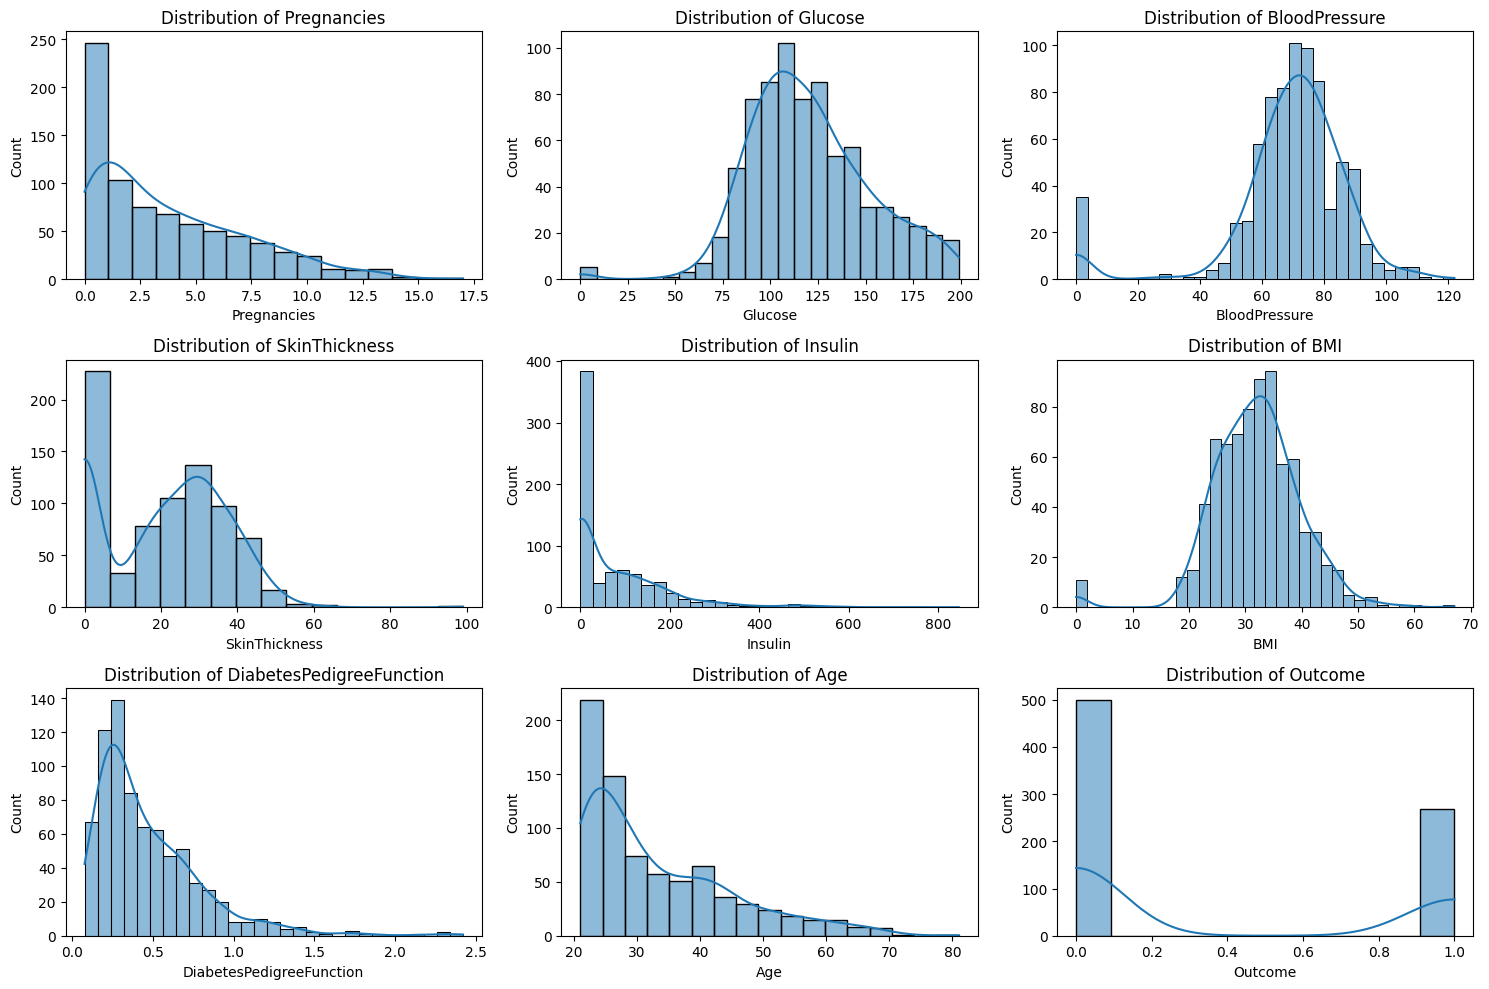

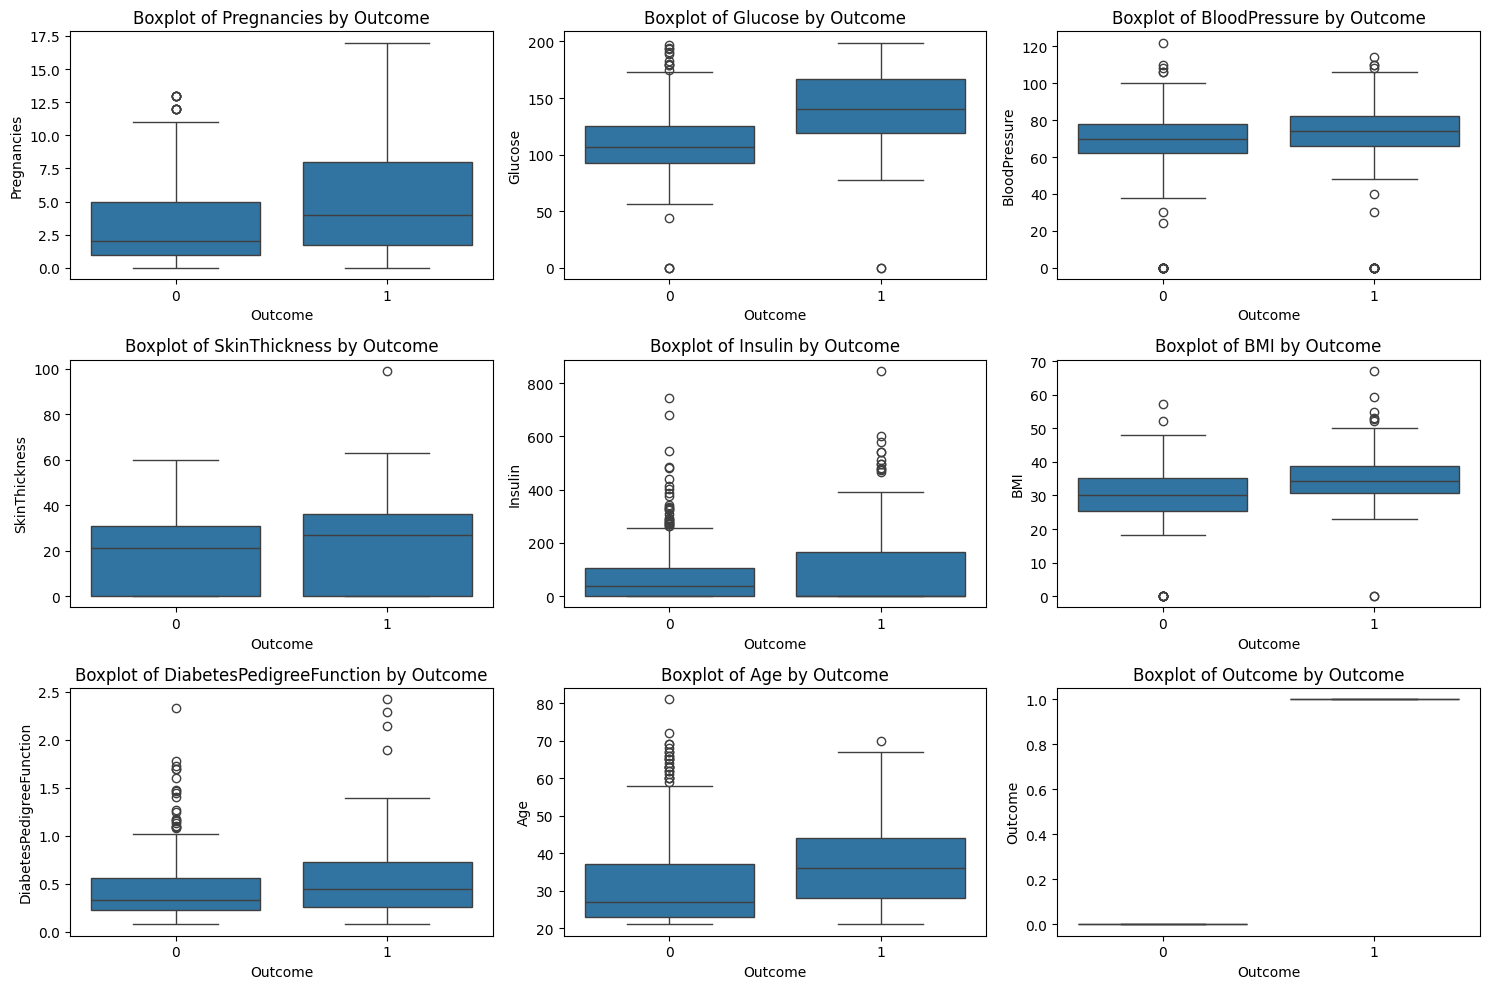

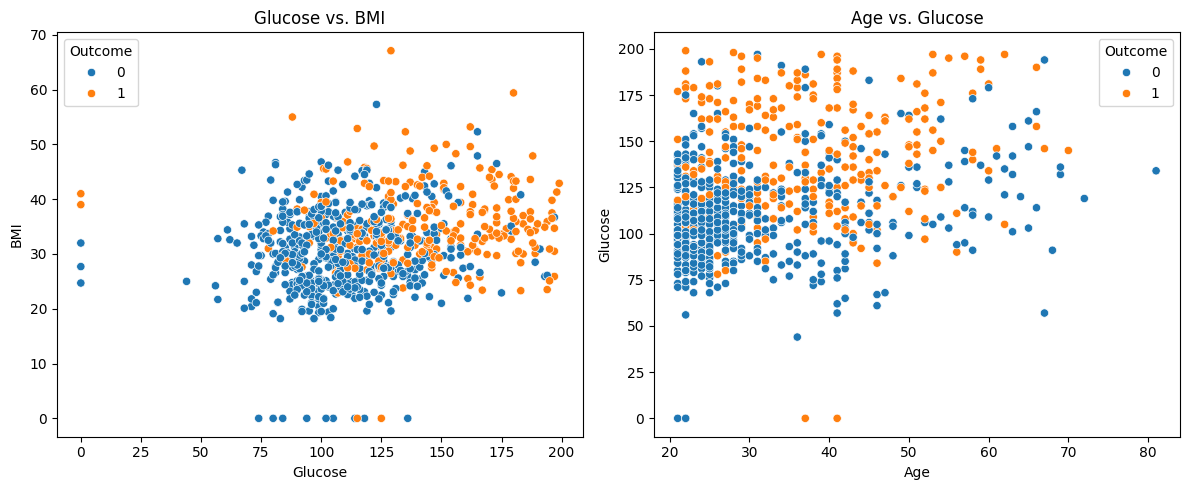

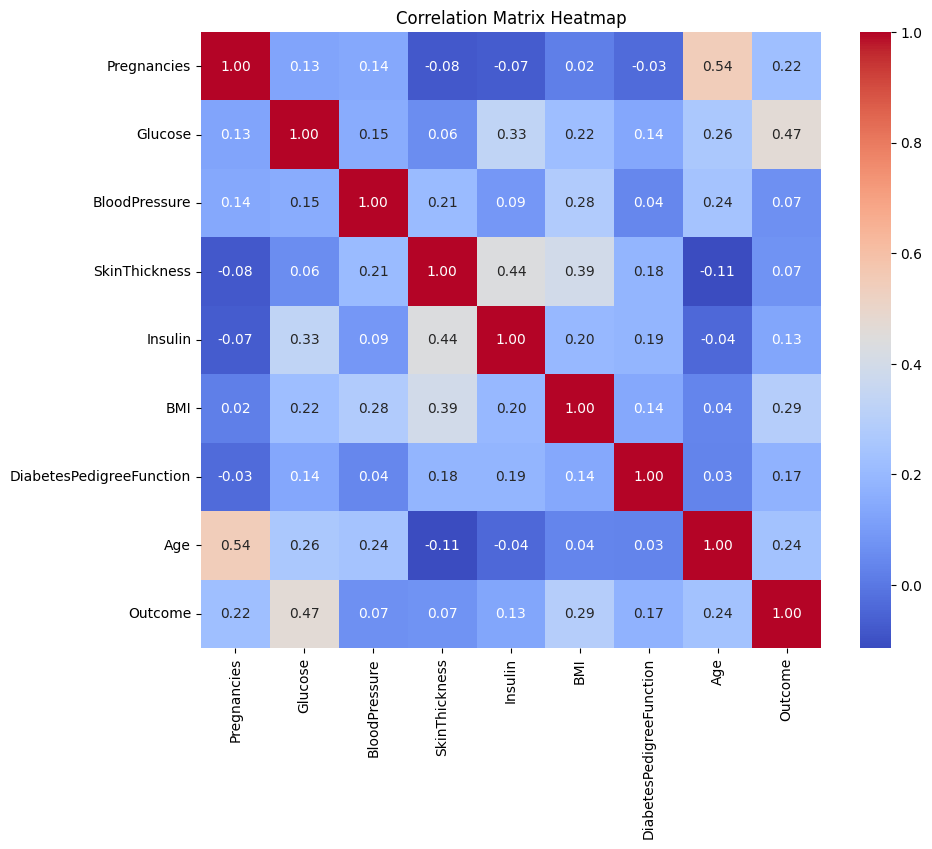

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot of {col} by Outcome')
plt.tight_layout()
plt.show()


# Scatter plots (Glucose vs. BMI, Age vs. Glucose)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucose vs. BMI')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Age vs. Glucose')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
The code has generated the requested visualizations. Now, document the observations based on these visualizations.



In [5]:
# Observations from visualizations:

# Histograms and Boxplots:
#  - Glucose, BloodPressure, SkinThickness, Insulin, and BMI show a number of zero values, which are likely erroneous and should be handled in data cleaning (imputation or removal).
#  - Age shows a right-skewed distribution.  Pregnancies also show a right-skewed distribution.
#  - Boxplots show clear differences in distributions for some features between diabetic and non-diabetic individuals, especially for Glucose, BMI, and Age. Outliers are visible in several features.


# Scatter plots:
#  - Glucose vs BMI:  Positive correlation, with higher Glucose values associated with higher BMI.  The separation of diabetic and non-diabetic groups is not very clear in this plot, suggesting it might not be the best predictor.
#  - Age vs Glucose:  No strong pattern is immediately observed from this plot.

# Correlation Matrix Heatmap:
#  - Glucose, BMI, and Age show moderate positive correlations with the outcome variable, suggesting that they could be potential predictors.  Other features show weak correlations.
#  - Some features have moderate correlations with each other.  For example, BMI and SkinThickness show some correlation.

# Overall:  Glucose, BMI, and Age seem to be the most promising features to investigate further.
# The presence of zero values is a major concern and needs to be addressed before further analysis.

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly seeks to understand the dataset's characteristics, identify key features related to diabetes, and discover potential correlations between variables.  The analysis successfully addresses these implicit questions.


### 2. Data Analysis Key Findings

* **Zero Values:**  Several key features ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') contain numerous zero values, likely representing erroneous data entries. These need to be addressed through imputation or removal (Data Exploration, Data Visualization).
* **Outcome Distribution:** The dataset has 500 (65.1%) individuals without diabetes and 268 (34.9%) with diabetes (Data Analysis).
* **Key Predictors:** 'Glucose' shows the strongest positive correlation (0.47) with diabetes, followed by 'BMI' (0.29).  'Age' also shows a positive correlation with the outcome (Data Analysis, Data Visualization).
* **Skewed Distributions:** 'Age' and 'Pregnancies' display right-skewed distributions (Data Visualization).


### 3. Insights or Next Steps

* **Data Cleaning:** Prioritize handling the numerous zero values in key features.  Imputation or removal of these values is crucial for more reliable analysis and modeling.
* **Feature Engineering:** Explore creating new features or transforming existing ones (e.g., log transformation for skewed features) to improve model performance.
